This is python code to analyze Athena++ simulations using the input file "athinput.bicon_wind" and the problem generator "bicon_wind.cpp".



In [ ]:
### Doing visualizations for the bipolar wind
### with the kinetic energy component
### spitting out PRIMITIVE quantities

In [1]:
import numpy as np
from pylab import *
import sys
sys.path.insert(0, '../athena-public-version/vis/python')
import athena_read as ar
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

In [2]:
### telling where the files are in relation to 'sys.path.insert' from above
base_dir  = "../path_to/folder_containing_input_file/"
spec_dir  = "folder_containing_input_file/"
#post      = ".tab"
post      = ".vtk"
inpf      = base_dir+spec_dir+"athinput.blast_sph"
hst_fname = base_dir+spec_dir+"Biconical_wind.hst"
fnbase    = base_dir+spec_dir+"Biconical_wind.block0.out5."
vtk_fnames = [fnbase+str(ii).zfill(5)+post for ii in range(201)]

# this is useful for 2D simulations, use it to take a slice for 1D profiles
slice_cell = 0

# input file
inp  = ar.athinput(inpf)
# .hst file
hst_data  = ar.hst(hst_fname)

vtk_data  = ar.vtk(vtk_fnames[0])
#print(vtk_data)


In [3]:
### all the constants
G      = 6.674e-8
kb     = 1.38064852e-16
Msol   = 2e33
clight = 2.998e10
mp     = 1.672621777e-24
me     = 9.1095e-28
st     = 6.65e-25
pc     = 3.086e+18
mu     = 0.6
gamma  = 1.6666666667
gm1    = gamma - 1.
xi_theory = 1.1517 # gamma 5./3. and spherical_polar

gam = gamma
gm1 = gam-1
rs = inp["problem"]["rs"]
E0 = inp["problem"]["E0"]
Mach = inp["problem"]["Mach"]
vr = inp["problem"]["vr"]
th1 = inp["problem"]["theta1"]
th2 = inp["problem"]["theta2"]
t_stop = inp["problem"]["tstop"]
Ash = 4 * np.pi * rs*rs * np.cos(th1)-np.cos(th2)

rhoin = (E0 * 2*gam*gm1) / (t_stop*Ash * (2/Mach/Mach + gam*gm1)) / (vr*vr*vr)

In [ ]:
### comparing pressure pseudocolor map to pressure maximum (imshow)

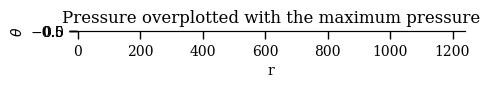

In [10]:
iii = 500
r,theta,phi,data = ar.vtk(vtk_fnames[iii])
pii = data['press'][0][:][:]
pslice = data['press'][0][:][slice_cell]
vii = data['vel'][0][0][0]
pmax= np.zeros(np.shape(pii))

# identify the maximum pressure for each theta
for jjj in range(len(pii)):
    maxi = np.argmax(pii[jjj])
    pmax[[jjj],maxi] = 1


plt.ion()
fs = 12
tfs= fs-2
plt.rcParams['xtick.major.size']  = 6
plt.rcParams['ytick.major.size']  = 6
plt.rcParams['xtick.minor.size']  = 3
plt.rcParams['ytick.minor.size']  = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.labelsize']   = tfs
plt.rcParams['ytick.labelsize']   = tfs
plt.rcParams['figure.figsize']    = 5,5
plt.rcParams['figure.dpi']        = 100
plt.rcParams['contour.negative_linestyle'] = 'solid'
#plt.rc('text', usetex=True)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

mj_cmap = cm.bwr
mj_cmap.set_under('k',alpha=0)

plt.imshow(pii)
plt.imshow(pmax,cmap=mj_cmap,interpolation='none',clim=[0.9,1])
plt.title("Pressure overplotted with the maximum pressure")
plt.xlabel('r')
plt.ylabel(r'$\theta$')

#plt.savefig('pressure_map_vs_max_thermal_sphere3.png')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


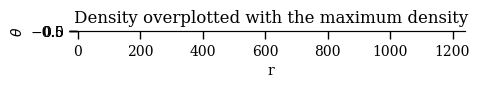

In [11]:
iii = 270
r,theta,phi,data = ar.vtk(vtk_fnames[iii])
pii = data['press'][0][:][:]
vii = data['vel'][0][:][:]
rhoii = data['rho'][0][:][:]
pmax= np.zeros(np.shape(pii))
rhomax= np.zeros(np.shape(rhoii))

# identify the maximum pressure for each theta
for jjj in range(len(pii)):
    maxi = np.argmax(pii[jjj])
    pmax[[jjj],maxi] = 1

# identify the maximum density for each theta
for jjj in range(len(rhoii)):
    maxi = np.argmax(rhoii[jjj])
    rhomax[[jjj],maxi] = 1


plt.ion()
fs = 12
tfs= fs-2
plt.rcParams['xtick.major.size']  = 6
plt.rcParams['ytick.major.size']  = 6
plt.rcParams['xtick.minor.size']  = 3
plt.rcParams['ytick.minor.size']  = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.labelsize']   = tfs
plt.rcParams['ytick.labelsize']   = tfs
plt.rcParams['figure.figsize']    = 5,5
plt.rcParams['figure.dpi']        = 100
plt.rcParams['contour.negative_linestyle'] = 'solid'
#plt.rc('text', usetex=True)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

mj_cmap = cm.bwr
mj_cmap.set_under('k',alpha=0)

plt.imshow(vii)
#plt.colorbar()
#plt.quiver([r,theta],vii)
#plt.imshow(pmax,cmap=mj_cmap,interpolation='none',clim=[0.9,1])
plt.imshow(rhomax,cmap=mj_cmap,interpolation='none',clim=[0.9,1])
plt.title("Density overplotted with the maximum density")
plt.xlabel('r')
plt.ylabel(r'$\theta$')

#plt.savefig('density_map_vs_max_kinetic1.png')
plt.show()

In [ ]:
### making line profiles like the 1D case

(1240,)
(1240,)


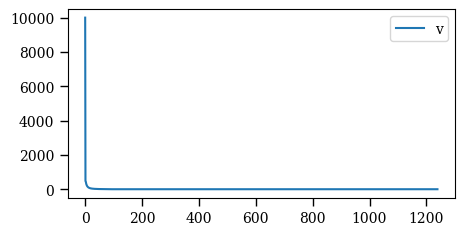

In [14]:
### testing the line profiles

iii = 170    #pick which 'frame' of the output files you want to plot
r,theta,phi,data = ar.vtk(vtk_fnames[iii])
p_slice = data['press'][0][:][slice_cell]
rho_slice = data['rho'][0][:][slice_cell]
v_slice = [data['vel'][0][:][slice_cell][iii][0] for iii in range(len(p_slice))] #list comprehension of velocity data
tmp_slice = p_slice/rho_slice
mach_slice = v_slice/np.sqrt(gamma*p_slice/rho_slice)

#print(max(v_slice))
print(shape(rho_slice))
print(shape(v_slice))

plt.rcParams['figure.figsize']    = 5,2.5
#plt.plot(rho_slice,label='rho')
plt.plot(v_slice,label='v')
plt.legend()
plt.show()


In [ ]:
### making a movie of the 1D profiles

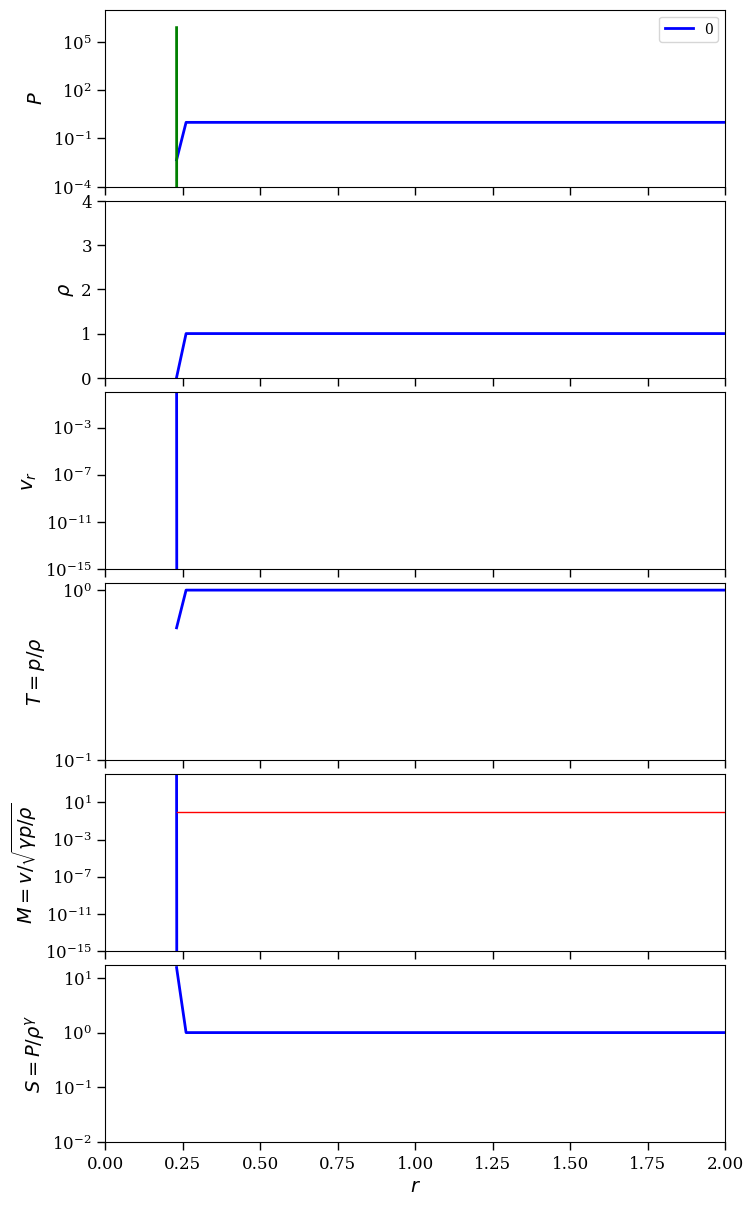

In [5]:
### making a test frame to check that things are being plotted correctly
r_axis_mode = 0    #static frame or tracking along with the shock front

# setting plotting parameters
fs = 14
plt.rcParams['xtick.major.size']  = 6
plt.rcParams['ytick.major.size']  = 6
plt.rcParams['xtick.minor.size']  = 3
plt.rcParams['ytick.minor.size']  = 0
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.labelsize']   = 12
plt.rcParams['ytick.labelsize']   = 12
plt.rcParams['figure.figsize']    = 8,15
plt.rcParams['figure.dpi']        = 100
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.rc('font', family='serif') 

fig, axs = plt.subplots(nrows=6,ncols=1)  
ax1,ax2,ax3,ax4,ax5,ax6 = axs

iii=0

# defining data to be plotted
mj_r_long,mj_theta,mj_phi,data = ar.vtk(vtk_fnames[iii])
mj_r = mj_r_long[1:]
#mj_time = data['time'][iii]
mj_p    = data['press'][0][:][slice_cell]
mj_rho  = data['rho'][0][:][slice_cell]
mj_v    = [data['vel'][0][:][slice_cell][iii][0] for iii in range(len(mj_p))]
mj_tmp  = mj_p/mj_rho
mj_mach = mj_v/np.sqrt(gamma*mj_p/mj_rho)
mj_ent  = mj_p/mj_rho**gamma
mj_prm=mj_rho*mj_v*mj_v
#lbl = "time="+str(mj_time)
lbl = str(0)

# defining arrays to plot helpful indicators
rblast =mj_r[np.argmax(mj_rho)]
rb_array = np.zeros(len(mj_r))
r_norm = np.divide(mj_r,rblast)
r86_arg = 0
blah = abs(r_norm-0.86)
rb_array[np.argmin(blah)] = 2
M1_array = np.ones(len(mj_r))
mj_rhoin = np.ones(len(mj_r))*rhoin

if r_axis_mode==0:
    ### static ranges
    plims = [1e-4,1e5]
    rholims = [0,4]
    prmlims = [0.01,1e7]
    vlims = [1e-15,1.1*any(max(mj_v))]
    tmplims = [0.1,1.1*max(mj_tmp)]
    machlims = [1e-15,1.1*max(mj_mach)]
    entlims = [0.01,1.1*max(mj_ent)]
    rlims = [0,2]
    
    # plot the data
    ax1.plot(mj_r,mj_p,color='blue',lw=2,label=lbl)
    ax1.plot(mj_r,mj_prm,color='green',lw=2)
    ax2.plot(mj_r,mj_rho,color='blue',lw=2)
    ax3.plot(mj_r,mj_v,color='blue',lw=2)
    ax4.plot(mj_r,mj_tmp,color='blue',lw=2)
    ax5.plot(mj_r,mj_mach,color='blue',lw=2)
    ax6.plot(mj_r,mj_ent,color='blue',lw=2)
    ax5.plot(mj_r,M1_array,color='red',lw=1)
else:
    ### Comoving frame for self similarity
    r_sh = rblast
    plims = [0.1,1.1*max(mj_p)]
    rholims = [1e-7,4]
    vlims = [1e-15,1.1*any(max(mj_v))]
    tmplims = [0.1,1.1*max(mj_tmp)]
    machlims = [1e-15,1.1*max(mj_mach)]
    entlims = [0.01,1.1*max(mj_ent)]
    prmlims = [1e-1,1e3]
    rlims = [0,1.1] 
    
    # plot the data
    ax1.plot(r_norm,mj_p,color='blue',lw=2,label=lbl)
    ax1.plot(mj_r,mj_prm,color='green',lw=2)
    ax2.plot(r_norm,mj_rho,color='blue',lw=2)
    ax2.plot(mj_r,mj_rhoin,color='red',lw=1)
    ax2.plot(r_norm,rb_array,color='red',lw=2)
    ax3.plot(r_norm,mj_v,color='blue',lw=2)
    ax4.plot(r_norm,mj_tmp,color='blue',lw=2)
    ax5.plot(r_norm,mj_mach,color='blue',lw=2)
    ax6.plot(r_norm,mj_ent,color='blue',lw=2)

# updating axis limits based on data
ax1.set_ylim(min(plims[0],prmlims[0]),max(plims[1],prmlims[1]))
ax1.set_xlim(rlims)
ax2.set_ylim(rholims)
ax2.set_xlim(rlims)
ax3.set_ylim(vlims)
ax3.set_xlim(rlims)
ax4.set_ylim(tmplims)
ax4.set_xlim(rlims)
ax5.set_ylim(machlims)
ax5.set_xlim(rlims)
ax6.set_ylim(entlims)
ax6.set_xlim(rlims)

ax1.set_yscale("log")
#ax2.set_yscale("log")
ax3.set_yscale("log")
ax4.set_yscale("log")
ax5.set_yscale("log")
ax6.set_yscale("log")

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax5.set_xticklabels([])

plt.subplots_adjust(hspace=0.08)

ax1.legend()
ax1.set_ylabel(r"$P$",fontsize=14)   
ax2.set_ylabel(r"$\rho$",fontsize=14)  
ax3.set_ylabel(r"$v_{r}$",fontsize=14) 
ax4.set_ylabel(r"$T=p/\rho$",fontsize=fs)
ax5.set_ylabel(r"$M=v/\sqrt{\gamma p/\rho}$",fontsize=fs) 
ax6.set_ylabel(r"$S=P/ \rho^{\gamma}$",fontsize=fs) 
ax6.set_xlabel(r"$r$",fontsize=14)
#fig.tight_layout()

plt.show()

In [8]:
#### packages for movies
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.pyplot import *

In [9]:
### calculate all the data for each frame of the movie
fr=200

system = []
rblast = []
tblast = []
for iii in range(fr):
    ri_raw_long, thetai, phii, data = ar.vtk(vtk_fnames[iii])
    ri_raw = ri_raw_long[1:]
    pi = data['press'][0][:][slice_cell]
    rhoi = data['rho'][0][:][slice_cell]
    vi = [data['vel'][0][:][slice_cell][iii][0] for iii in range(len(pi))]
    tmpi = pi/rhoi
    machi = vi/np.sqrt(gamma*pi/rhoi)
    enti = pi/rhoi**gamma
    prmi = rhoi*vi*vi
    ti = hst_data['time'][iii]
    
    #rb_posi = np.argmax(rhoi)
    rb_posi = 0
    for ii in np.arange(len(rhoi)-1,0,-1):
        if rhoi[ii] > 1.5:
            rb_posi = ii
            break
    r_shi = ri_raw[rb_posi]
    ri = ri_raw  # for axis mode 0
    #ri = np.divide(ri_raw,r_shi)  # for axis mode 1
    
    ri2= abs(ri-0.86)
    r86_posi = np.argmin(ri2)
    
    tblast += [[ti]]
    rblast += [[r_shi]]
    system += [[ri,pi,rhoi,vi,tmpi,machi,enti,prmi,ti,r_shi,rb_posi,r86_posi]]

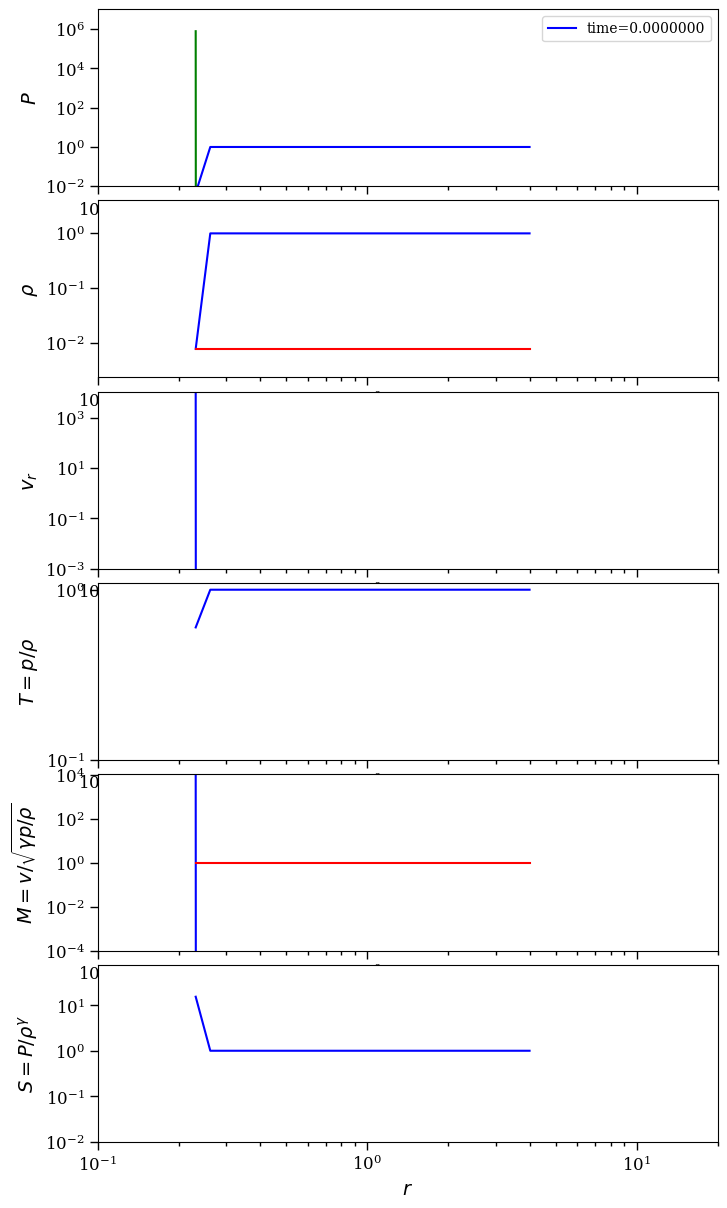

In [10]:
### plotting for each frame of the movie
r_axis_mode = 0

fig, axs = plt.subplots(nrows=6,ncols=1)  
ax1,ax2,ax3,ax4,ax5,ax6 = axs
ax1.set_ylim(plims)
ax2.set_ylim(rholims)
ax3.set_ylim(vlims)
ax4.set_ylim(tmplims)
ax5.set_ylim(machlims)
ax6.set_ylim(entlims)

ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale("log")
ax4.set_yscale("log")
ax5.set_yscale("log")
ax6.set_yscale("log")

ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")
ax4.set_xscale("log")
ax5.set_xscale("log")
ax6.set_xscale("log")

ax1.set_ylabel(r"$P$",fontsize=14)   
ax2.set_ylabel(r"$\rho$",fontsize=14)  
ax3.set_ylabel(r"$v_{r}$",fontsize=14) 
ax4.set_ylabel(r"$T=p/\rho$",fontsize=fs)
ax5.set_ylabel(r"$M=v/\sqrt{\gamma p/\rho}$",fontsize=fs) 
ax6.set_ylabel(r"$S=P/ \rho^{\gamma}$",fontsize=fs) 
ax6.set_xlabel(r"$r$",fontsize=14)

plt.subplots_adjust(hspace=0.08)

#fig.tight_layout()

mj_r0      = system[0][0]
mj_p0      = system[0][1]
mj_rho0    = system[0][2]
mj_v0      = system[0][3]
mj_tmp0    = system[0][4]
mj_mach0   = system[0][5]
mj_ent0    = system[0][6]
mj_prm0    = system[0][7]
mj_t0      = system[0][8]
mj_rblast0 = system[0][9]
mj_rblast1 = np.zeros(len(mj_r0))
mj_rblast1[system[0][11]] = 4
mj_M1      = np.ones(len(mj_r0))
mj_rhoin = np.ones(len(mj_r0))*rhoin
lbl="time="+str(mj_t0)

line1,  = ax1.plot(mj_r0,mj_p0,color="blue",label=lbl)
line11, = ax1.plot(mj_r0,mj_prm0,color="green")
line2,  = ax2.plot(mj_r0,mj_rho0,color="blue")
line21, = ax2.plot(mj_r0,mj_rhoin,color="red")
line3,  = ax3.plot(mj_r0,mj_v0,color="blue")
line4,  = ax4.plot(mj_r0,mj_tmp0,color="blue")
line5,  = ax5.plot(mj_r0,mj_mach0,color="blue")
line51, = ax5.plot(mj_r0,mj_M1,color='red')
line6,  = ax6.plot(mj_r0,mj_ent0,color="blue")

"""
# vertical line at the blast front
line10, = ax1.plot(mj_r0,mj_rblast1,color="red")
line20, = ax2.plot(mj_r0,mj_rblast1,color="red")
line30, = ax3.plot(mj_r0,mj_rblast1,color="red")
line40, = ax4.plot(mj_r0,mj_rblast1,color="red")
line50, = ax5.plot(mj_r0,mj_rblast1,color="red")
line60, = ax6.plot(mj_r0,mj_rblast1,color="red")
"""
ax1.legend()

def animate(ii):
    x=system[ii]
    legend  = ax1.legend()

    if r_axis_mode==0:
        ### static ranges
        plims = [1e-1,1.1*max(x[1])]
        rholims = [0.5*min(0.1,min(x[1])),max(max(x[2]),4)]
        vlims = [1e-3,1.1*max(max(x[3]),1)]
        tmplims = [0.1,1.1*max(x[4])]
        machlims = [1e-4,1.1*max(x[5])]
        entlims = [0.01,5*max(x[6])]
        prmlims = [0.01,1e7]
        rlims = [0.1,20.]
    else:
        ### Comoving frame for self similarity
        r_sh = x[9]
        rb_pos = x[11]
        rb_array = np.zeros(len(x[0]))
        rb_array[rb_pos] = 2
        plims = [1e-1,1.1*max(x[1])]
        rholims = [0.5*min(0.1,min(x[1])),max(max(x[2]),4)]
        vlims = [1e-3,1.1*max(max(x[3]),1)]
        tmplims = [0.1,1.1*max(x[4])]
        machlims = [1e-4,1.1*max(x[5])]
        entlims = [0.01,5*max(x[6])]
        prmlims = [0.1,1e3]
        rlims = [0,1.1]    
    
    ax1.set_ylim(min(plims[0],prmlims[0]),max(plims[1],prmlims[1]))
    ax2.set_ylim(rholims)
    ax3.set_ylim(vlims)
    ax4.set_ylim(tmplims)
    ax5.set_ylim(machlims)
    ax6.set_ylim(entlims)
    ax1.set_xlim(rlims)
    ax2.set_xlim(rlims)
    ax3.set_xlim(rlims)
    ax4.set_xlim(rlims)
    ax5.set_xlim(rlims)
    ax6.set_xlim(rlims)
    
    line1.set_data(x[0],x[1])
    line11.set_data(x[0],x[7])
    line2.set_data(x[0],x[2])
    line3.set_data(x[0],x[3])
    line4.set_data(x[0],x[4])
    line5.set_data(x[0],x[5])
    line6.set_data(x[0],x[6])
    
    """
    # vertical line at the blast front
    line10.set_data(x[0],rb_array*plims[1])
    line20.set_data(x[0],rb_array)
    line30.set_data(x[0],rb_array*vlims[1])
    line40.set_data(x[0],rb_array*tmplims[1])
    line50.set_data(x[0],rb_array*machlims[1])
    line60.set_data(x[0],rb_array*entlims[1])
    """
    
    mj_rhoin = np.ones(len(x[0]))*rhoin
    M1 = np.ones(len(x[0]))
    line21.set_data(x[0],mj_rhoin)
    line51.set_data(x[0],M1)
    lbl="time={:.7f}".format(x[8])
    line1.set_label(lbl)
    legend.remove()
    legend = ax1.legend()
    
    #return line1, line11, line10, line2, line20, line3, line30, line4, line40, line5, line51, line50, line6, line60, legend
    return line1, line11, line2, line3, line4, line5, line51, line6, legend

ani=animation.FuncAnimation(fig, animate, interval=120, blit=True, frames=fr)
show()

In [11]:
### make a downloadable version of the movie
HTML(ani.to_html5_video())

In [ ]:
### E vs time

In [328]:
### calculating the location of the blast, checking against analytic solution
time = hst_data['time']
mass = hst_data['mass']
Etot = hst_data['tot-E']
dEtot= (Etot-Etot[0])*8/(np.cos(1.47079632679) - np.cos(1.67079632679))
#Esh  = hst_data['Esh']
#Rsh  = hst_data['Rsh']
E0   = inp["problem"]["E0"]

In [329]:
time_1 = time
mass_1 = mass
Etot_1 = Etot
dEtot_1 = dEtot
#Esh_1 = Esh 
#Rsh_1 = Rsh 
E0_1 = E0 

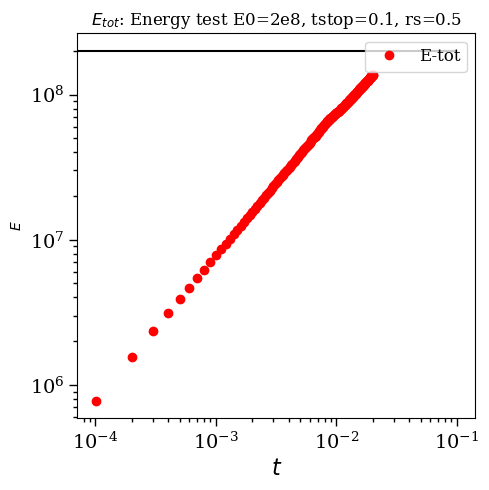

In [331]:
plt.ion()
fs = 16
tfs= fs-2
plt.rcParams['xtick.major.size']  = 6
plt.rcParams['ytick.major.size']  = 6
plt.rcParams['xtick.minor.size']  = 3
plt.rcParams['ytick.minor.size']  = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.labelsize']   = tfs
plt.rcParams['ytick.labelsize']   = tfs
plt.rcParams['figure.figsize']    = 5,5
plt.rcParams['figure.dpi']        = 100
plt.rcParams['contour.negative_linestyle'] = 'solid'
#plt.rc('text', usetex=True)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
#plt.rc('font', family='sans-serif')
#
fig,ax1  = plt.subplots()


ax1.plot(time_1,dEtot_1,"ro",label="E-tot")
ax1.hlines(E0_1,0,0.1)

ax1.legend(loc=0,fontsize=tfs-2)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"$t$",fontsize=fs)
ax1.set_ylabel(r"$E$")
#ax1.set_ylim([1e4,1e8])
plt.title(r'$E_{tot}$: Energy test E0=2e8, tstop=0.1, rs=0.5')

fig.tight_layout()
#fig.savefig('E_test_e0_2e8_mike.png')
plt.show()

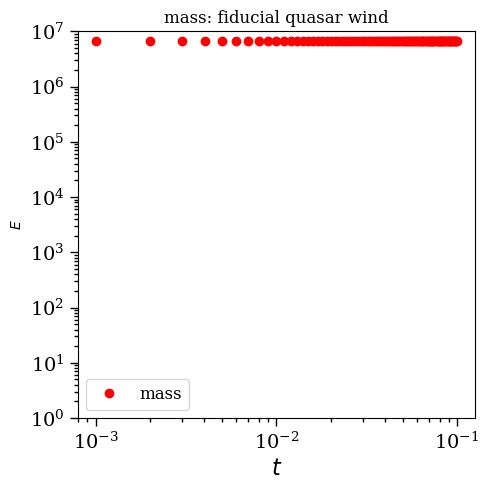

In [159]:
plt.ion()
fs = 16
tfs= fs-2
plt.rcParams['xtick.major.size']  = 6
plt.rcParams['ytick.major.size']  = 6
plt.rcParams['xtick.minor.size']  = 3
plt.rcParams['ytick.minor.size']  = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.labelsize']   = tfs
plt.rcParams['ytick.labelsize']   = tfs
plt.rcParams['figure.figsize']    = 5,5
plt.rcParams['figure.dpi']        = 100
plt.rcParams['contour.negative_linestyle'] = 'solid'
#plt.rc('text', usetex=True)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
#plt.rc('font', family='sans-serif')
#
fig,ax1  = plt.subplots()


ax1.plot(time_1,mass_1,"ro",label="mass")

ax1.legend(loc=0,fontsize=tfs-2)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"$t$",fontsize=fs)
ax1.set_ylabel(r"$E$")
ax1.set_ylim([1,1e7])
plt.title('mass: fiducial quasar wind')

fig.tight_layout()
#fig.savefig('E_compare_quasar2_full.png')
plt.show()

In [ ]:
### four panel comparison for determining if a simulation has become self similar
### plots the position, speed, and their derivatives of the shock front

In [140]:
## taking a slice from a 2d simulation
fr=200

r_arr     = []
tshock    = []
rshock    = []
pshock    = []
rhoshock  = []
vshock    = []
for iii in range(fr):
    ri_raw_long, thetai, phii, data = ar.vtk(vtk_fnames[iii])
    #ri_raw = ri_raw_long[1:]
    ri = ri_raw_long[1:]
    pi = data['press'][0][:][slice_cell]
    rhoi = data['rho'][0][:][slice_cell]
    vi = [data['vel'][0][:][slice_cell][iii][0] for iii in range(len(pi))]
    
    #rb_posi = np.argmax(rhoi)
    rb_posi = 0
    for ii in np.arange(len(rhoi)-1,0,-1):
        if rhoi[ii] > 1.5:
            rb_posi = ii
            break
    r_shi = ri[rb_posi]
    p_shi = pi[rb_posi]
    rho_shi = rhoi[rb_posi]
    v_shi = vi[rb_posi]
    ti = hst_data['time'][iii]
    
    #r_arr     += [[ri]]
    tshock    += [ti]
    rshock    += [r_shi]
    pshock    += [p_shi]
    rhoshock  += [rho_shi]
    vshock    += [v_shi]


In [141]:
reduce = 10    #smoothes the data
t_avg = np.array(tshock[::reduce])

rshock = np.array(rshock)
r_avg = np.mean(rshock.reshape(-1,reduce),axis=1)
dr_dt = np.gradient(np.log(r_avg),np.log(t_avg))
vshock = np.array(vshock)
v_avg = np.mean(vshock.reshape(-1,reduce),axis=1)
dv_dt = np.gradient(np.log(v_avg),np.log(t_avg))

<ipython-input-141-dbd0bfd48798>:6: RuntimeWarning: divide by zero encountered in log
  dr_dt = np.gradient(np.log(r_avg),np.log(t_avg))
/Users/rita/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1062: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/rita/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1063: RuntimeWarning: invalid value encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
<ipython-input-141-dbd0bfd48798>:9: RuntimeWarning: divide by zero encountered in log
  dv_dt = np.gradient(np.log(v_avg),np.log(t_avg))


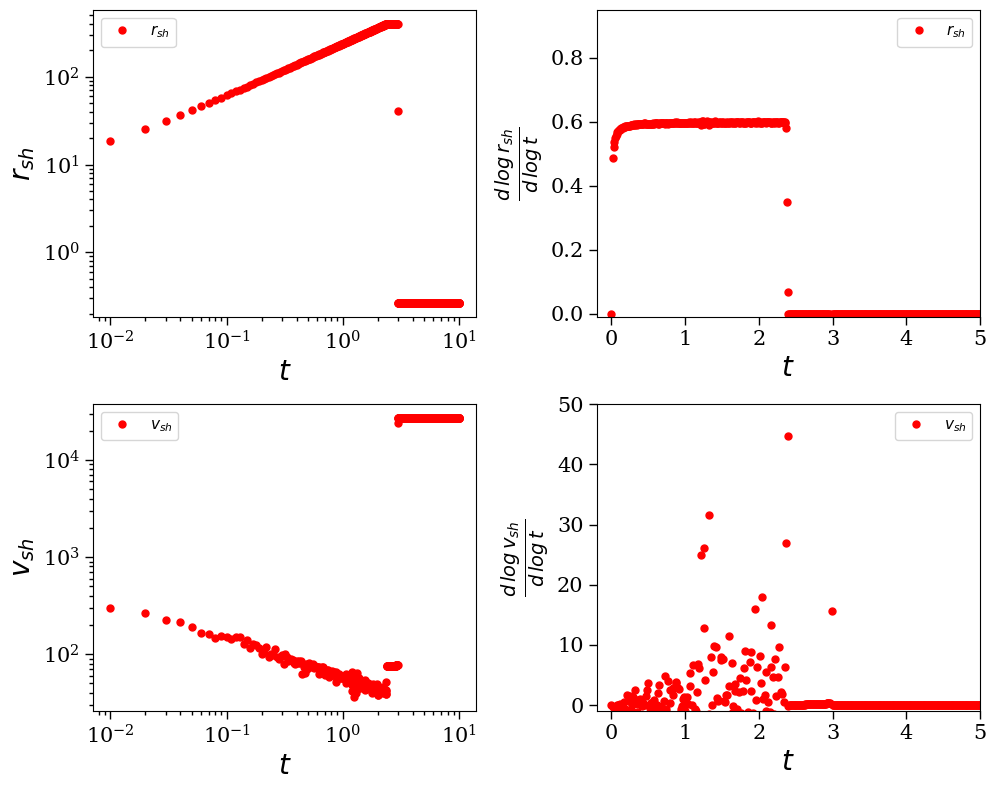

In [147]:

plt.ion()
fs = 20
tfs= fs-5
plt.rcParams['xtick.major.size']  = 6
plt.rcParams['ytick.major.size']  = 6
plt.rcParams['xtick.minor.size']  = 3
plt.rcParams['ytick.minor.size']  = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.labelsize']   = tfs
plt.rcParams['ytick.labelsize']   = tfs
plt.rcParams['figure.figsize']    = 10,8
plt.rcParams['figure.dpi']        = 100
plt.rcParams['contour.negative_linestyle'] = 'solid'
#plt.rc('text', usetex=True)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fig,axs  = plt.subplots(nrows=2,ncols=2)

t_stop = 10

axs[0,0].plot(t_avg,r_avg,"r.",label=r"$r_{sh}$",ms=10.)
#axs[0,0].vlines(t_stop,min(r_avg),max(r_avg),label="energy cutoff")
axs[0,0].set_xlabel(r"$t$",fontsize=fs)
axs[0,0].set_ylabel(r"$r_{sh}$",fontsize=fs)
axs[0,0].legend(loc=0,fontsize=tfs-4)
axs[0,0].set_yscale('log')
axs[0,0].set_xscale('log')

axs[0,1].plot(t_avg,dr_dt,"r.",label=r"$r_{sh}$",ms=10.)
#axs[0,1].vlines(t_stop,min(dr_dt),max(dr_dt),label="energy cutoff")
#axs[0,1].hlines(0.4,min(t_avg),max(t_avg),'b')
#axs[0,1].hlines(0.6,min(t_avg),max(t_avg),'r',label="injection prediction")
axs[0,1].set_xlabel(r"$t$",fontsize=fs)
axs[0,1].set_ylabel(r"$\frac{d\,log\,r_{sh}}{d\,log\,t}$",fontsize=fs)
axs[0,1].legend(loc=0,fontsize=tfs-4)
#axs[0,1].set_yscale('log')
#axs[0,1].set_xscale('log')
axs[0,1].set_xlim([-0.2,5])
axs[0,1].set_ylim([-0.01,0.95])

axs[1,0].plot(t_avg,v_avg,"r.",label=r"$v_{sh}$",ms=10.)
#axs[1,0].vlines(t_stop,min(v_avg),max(v_avg),label="energy cutoff")
axs[1,0].set_xlabel(r"$t$",fontsize=fs)
axs[1,0].set_ylabel(r"$v_{sh}$",fontsize=fs)
axs[1,0].legend(loc=0,fontsize=tfs-4)
axs[1,0].set_yscale('log')
axs[1,0].set_xscale('log')
#axs[1,0].set_ylim([.9,11])

axs[1,1].plot(t_avg,dv_dt,"r.",label=r"$v_{sh}$",ms=10.)
#axs[1,1].vlines(t_stop,min(dv_dt),max(dv_dt),label="energy cutoff")
#axs[1,1].hlines(-0.4,min(t_avg),max(t_avg),'r',label="injection prediction")
#axs[1,1].hlines(-0.6,min(t_avg),max(t_avg),'b')
axs[1,1].set_xlabel(r"$t$",fontsize=fs)
axs[1,1].set_ylabel(r"$\frac{d\,log\,v_{sh}}{d\,log\,t}$",fontsize=fs)
axs[1,1].legend(loc=0,fontsize=tfs-4)
#axs[1,1].set_yscale('log')
#axs[1,1].set_xscale('log')
axs[1,1].set_xlim([-0.2,5])
axs[1,1].set_ylim([-1,50])

plt.tight_layout()
#fig.savefig('rsh_const_injection_quasar2_full.png')
plt.show()